## 3. Описательная статистика. Качественные и количественные характеристики популяции. Графическое представление данных

In [22]:
import numpy as np
from math import factorial as f
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [23]:
def c(k, n):
    return f(n)/(f(k)*f(n-k))

#### 1. Даны значения зарплат из выборки выпускников: 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150. Посчитать (желательно без использования статистических методов наподобие std, var, mean) среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки. Сделать графическую интерпретацию данных, проанализовать выбросы, посчитать квартили и интерквартильное расстояние

In [27]:
a = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
mean = a.sum()/len(a)
print("Мат. ожидание:")
print(mean, a.mean())
var = ((a - mean)**2).sum()/len(a)
print("Смещенная дисперсия:")
print(var, a.var())
var_ = ((a - mean)**2).sum()/(len(a) - 1)
print("Несмещенная дисперсия:")
print(var_, a.var(ddof=1))
print("Стандартное (среднеквадратичное) отклонение:")
print(np.sqrt(var), a.std())

Мат. ожидание:
65.3 65.3
Смещенная дисперсия:
950.11 950.11
Несмещенная дисперсия:
1000.1157894736842 1000.1157894736842
Стандартное (среднеквадратичное) отклонение:
30.823854398825596 30.823854398825596


(array([1., 3., 1., 0., 1., 1., 1., 3., 2., 2., 3., 0., 1., 0., 0., 0., 0.,
        0., 0., 1.]),
 array([ 17.  ,  23.65,  30.3 ,  36.95,  43.6 ,  50.25,  56.9 ,  63.55,
         70.2 ,  76.85,  83.5 ,  90.15,  96.8 , 103.45, 110.1 , 116.75,
        123.4 , 130.05, 136.7 , 143.35, 150.  ]),
 <BarContainer object of 20 artists>)

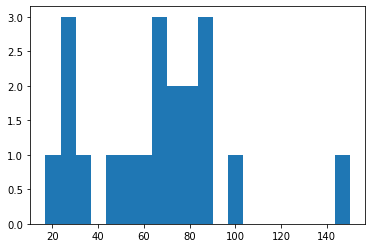

In [28]:
plt.hist(a, bins=20)


<AxesSubplot:>

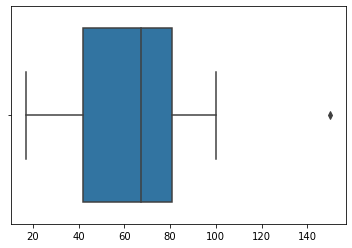

In [29]:
sns.boxplot(a, whis=1.5)
## все, что меньше 17 и больше 100 можно считать выбросом
## хотя на такой маленькой выборке по зарплатам вполне можен быть
## по гистограмме можно и 100 за выброс принять
## нужно больше данных...

In [35]:
q1 = np.quantile(a, q=0.25)
q2 = np.quantile(a, q=0.5)
q3 = np.quantile(a, q=0.75)

print(f'первый квартиль = {q1}, второй квартиль(медиана) = {q2}, третий квартиль = {q3}' )
print(f'интерквартильный размах = {q3 -q1}')


первый квартиль = 42.0, второй квартиль(медиана) = 67.5, третий квартиль = 81.0
интерквартильный размах = 39.0


#### 2. В первом ящике находится 8 мячей, из которых 5 - белые. Во втором ящике - 12 мячей, из которых 5 белых. Из первого ящика вытаскивают случайным образом два мяча, из второго - 4. Какова вероятность того, что 3 мяча белые?

In [36]:
## Варианты такие: 
## 2 белых из первого, 1 из второго
## 1 белый из первого, 2 из второго               
## все белые из второго

(c(2, 5)/c(2, 8))*((c(1, 5)*c(3, 7))/c(4, 12)) + ((c(1, 5)*c(1, 3))/c(2, 8))*((c(2, 5)*c(2, 7))/c(4, 12)) + \
(c(2, 3)/c(2, 8))*((c(3, 5)*c(1, 7))/c(4, 12))

0.3686868686868687

#### 3. В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a). на факультете A б). на факультете B в). на факультете C?

In [40]:
## вероятности, что это студенты факультета А и В одинаковы и равны 1/4
## вероятность, что это студент факультета С равна 1/2

P_sessionA = 0.8
P_sessionB = 0.7
P_sessionC = 0.9
## полная вероятность сдачи 
P_full = 0.25*P_sessionA + 0.25*P_sessionB + 0.5*P_sessionC
print(f"Вероятность, что сдал студент факультета А = {0.25*P_sessionA/P_full}")
print(f"Вероятность, что сдал студент факультета В = {0.25*P_sessionB/P_full}")
print(f"Вероятность, что сдал студент факультета С = {0.5*P_sessionC/P_full}")

Вероятность, что сдал студент факультета А = 0.24242424242424246
Вероятность, что сдал студент факультета В = 0.21212121212121213
Вероятность, что сдал студент факультета С = 0.5454545454545455


#### 4. Устройство состоит из трех деталей. Для первой детали вероятность выйти из строя в первый месяц равна 0.1, для второй - 0.2, для третьей - 0.25. Какова вероятность того, что в первый месяц выйдут из строя: а). все детали б). только две детали в). хотя бы одна деталь г). от одной до двух деталей?

In [44]:
## a)
p_a = 0.1*0.2*0.25
print("а)", p_a)
## б)
p_b = 0.1*0.2*(1-0.25) + 0.1*0.25*(1-0.2) + 0.2*0.25*(1-0.1)
print("б)", p_b)
## в) тут проще посчитать вероятность, что не выдет ни одна и вычесть из 1
p_c = 1 - (1-0.1)*(1-0.2)*(1-0.25)
print("в)", p_c)
## г) тут посчитаем выроятность выхода одной и сложим с вероятностью выхода двух. 
p_d = p_b + 0.1*(1-0.2)*(1-0.25) + (1-0.1)*0.2*(1-0.25) + (1-0.1)*(1-0.2)*0.25
## второй вариант вычесть из 1 веротность, что выйдут все три и вероятность что не выйдет ни одна
p_d_ = 1 - p_a - (1-0.1)*(1-0.2)*(1-0.25)
print("г)", p_d, p_d_)

а) 0.005000000000000001
б) 0.08000000000000002
в) 0.45999999999999996
г) 0.45500000000000007 0.45499999999999996
